In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def csv_to_dataframe(file_path):

    df = pd.read_csv(file_path)
    return df

def sort_dataframe_by_column(df, column_name, ascending=True):

    sorted_df = df.sort_values(by=column_name, ascending=ascending)
    return sorted_df

In [12]:
data_opaque = csv_to_dataframe("data/6-3cm_opaque.csv")
data_partial = csv_to_dataframe("data/30-3cm.csv")
data_opaque = sort_dataframe_by_column(data_opaque, "resgister")



In [ ]:
data_registerZero = data_opaque[data_opaque["resgister"] == 0]
averages_close = data_registerZero.groupby("trialNum")["reading (mm)"].median()
averages_partial = data_partial.groupby("trialNum")["reading (mm)"].mean()
print(averages_partial)
print(averages)

trialNum
1     295.74
2     288.31
3     276.45
4     268.93
5     257.65
6     250.16
7     240.61
8     232.07
9     223.21
10    218.51
11    204.36
12    185.98
13    183.47
14    170.59
15    159.68
16    157.20
Name: reading (mm), dtype: float64
trialNum
1     54.0
2     51.0
3     48.0
4     45.0
5     40.0
6    103.0
7    192.0
Name: reading (mm), dtype: float64


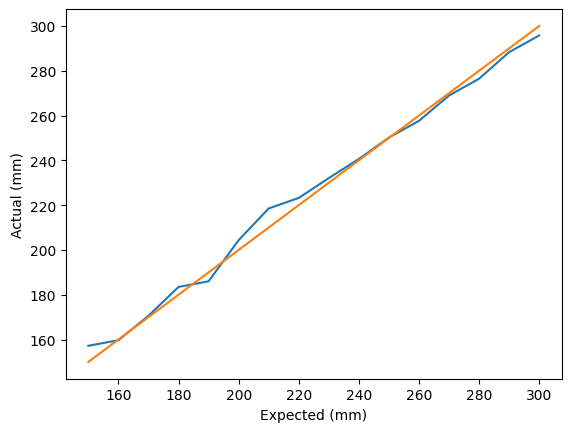

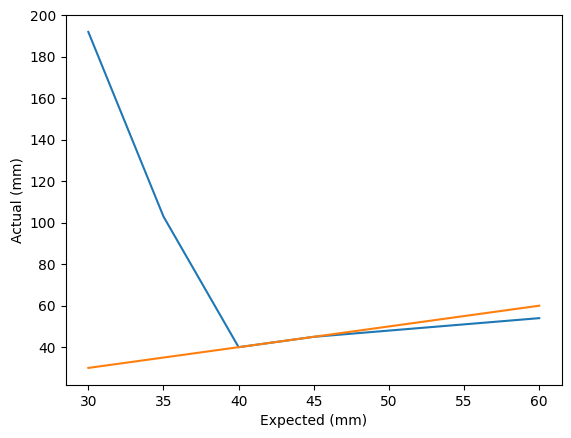

In [20]:
expected = [300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150]
expected_close = [60, 55, 50, 45, 40, 35, 30]
plt.figure()
plt.plot(expected, averages_partial)
plt.plot(expected, expected)
plt.xlabel("Expected (mm)")
plt.ylabel("Actual (mm)")

plt.figure()
plt.plot(expected_close, averages_close)
plt.plot(expected_close, expected_close)
plt.xlabel("Expected (mm)")
plt.ylabel("Actual (mm)")


plt.show()